In [24]:
import pandas as pd
import numpy as np
import time

# Data visualization and manipulation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from pprint import pprint

# Natural language processing and modeling
import nltk.sentiment
import nltk
import re
from scipy.stats import f_oneway, stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import ToktokTokenizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# SQL credentials and data acquisition
# import env as e
# import acquire as a
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests
from bs4 import BeautifulSoup

# GitHub API credentials
# from env import github_token, github_username

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### Miatta wrangle files

In [25]:
def tokenize(text):
    """
    Tokenizes the words in the input string.
    """
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens

def clean(text: str) -> list: 
    """
    Cleans up the input text data.
    """
    text = (text.encode('ascii', 'ignore')
                .decode('utf-8', 'ignore')
                .lower())
    
    words = re.sub(r'[^\w\s]', ' ', text).split()
    
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

def nlp_wrangle():
    """
    Performs data wrangling for natural language processing (NLP) tasks.
    Returns a processed DataFrame for NLP analysis.
    """
    # Load data from JSON file
    df = pd.read_json('data2.json')
    
    # Tokenize and clean contents
    df['clean_contents'] = df.readme_contents.apply(tokenize).apply(' '.join)
    df['clean_contents'] = df.clean_contents.apply(clean).apply(' '.join)
    
     # Words to remove
    words_to_remove = ['http', 'com', '124', 'www','github', 'top', 'go','107', '0','1','2','3','4', '5', '6', '7', '8','9', 'md','p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'em', 'abbr', 'q','ins', 'del', 'dfn', 'kbd', 'pre', 'samp', 'var', 'br', 'div', 'a', 'img', 'param', 'ul','ol', 'li', 'dl', 'dt', 'dd']

    # Remove specific words from clean_contents
    for word in words_to_remove:
        df['clean_contents'] = df['clean_contents'].str.replace(word, '')

    # Add message_length and word_count columns
    df['message_length'] = df['clean_contents'].str.len()
    df['word_count'] = df.clean_contents.apply(clean).apply(len)

    # Keep only top languages and assign others to 'Other'
    languages_to_keep = ['JavaScript', 'Python', 'Java', 'TypeScript', 'HTML']
    df['language'] = np.where(df['language'].isin(languages_to_keep), df['language'], 'Other')

    # Filter DataFrame based on conditions
    df = df.loc[(df['word_count'] <= 10000) & (df['message_length'] <= 60000)]

    return df

def intersection_list():
    words_df = nlp_wrangle()
    readme_words_list = words_df.clean_contents.to_list()
    readme_words_list

    readme_words = []
    for list in readme_words_list:
        split_list = list.split()
        readme_words.append(split_list)

    words_list = []
    for _ in readme_words:
        for el in _:
            words_list.append(el)

    dictionary_words = pd.read_csv('/usr/share/dict/words', header=None)
    dictionary_words = dictionary_words.drop(index=[122337,122338])
    dictionary_words = dictionary_words.squeeze()
    intersect = set(words_list) & set(dictionary_words)
    intersect = sorted(intersect)
    return intersect

def extra_clean_column(words_df):
    extra_clean_article = []
    for i in words_df.index:
        article_words = words_df.clean_contents[i].split()
        extra_clean = set(intersect) & set(article_words)
        extra_clean = sorted(extra_clean)
        extra_clean = ' '.join(extra_clean)
        extra_clean_article.append(extra_clean)

    words_df = words_df.assign(extra_clean_contents = extra_clean_article) 
    return words_df

In [26]:
words_df = nlp_wrangle()
intersect = intersection_list()
words_df = extra_clean_column(words_df)
words_df

,repo,language,readme_contents,clean_contents,message_length,word_count,extra_clean_contents
0,TheAlgorithms/Python,Python,"<div align=""center"">\n<!-- Title: -->\n <a hr...",gn center title href thelrithms src rw u...,1585,257,b better blob blue build center code contribut...
1,apache/flink,Java,# Apache Flink\n\nApache Flink is an open sour...,che fnk che fnk oen source strem rocessing frm...,2722,454,bug build building built che check clone code ...
2,forezp/SpringCloudLearning,Java,>转载请标明出处： \n> http://blog.csdn.net/forezp/arti...,blog csdn net forez rticle detil blog csdn ...,4370,617,boot boots bus center cloud cor discovery f fe...
3,learn-co-students/python-dictionaries-readme-d...,Other,\n# Dictionaries \n\n### Introduction\n\nAfter...,dictionry introduction introducing working st ...,5385,828,bee beginning bit built ce continue correct co...
4,angular/angular-phonecat,JavaScript,# AngularJS Phone Catalog Tutorial Application...,ngrjs hone ctlog tutoril ction overview ction ...,6259,1028,b best binding bine building cent check checko...
...,...,...,...,...,...,...,...
109,lin-xin/vue-manage-system,Other,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme t...,15727,2730,best blob body build c cense checked clone cod...
110,Significant-Gravitas/Auto-GPT,Python,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme de...,30234,4748,b bed blob block blue body border bottom busin...
112,namndwebdev/tang-crush,JavaScript,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme cs...,5387,830,bit blob body c cho code content coy crush d d...
113,learn-co-students/javascript-arrays-lab-bootca...,JavaScript,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme te...,8871,1248,beginning bit bite blob body bug butter cense ...


### Use functions from the miatta model py file and put into a model.py

In [50]:
def split_data(df, variable):
    """
    Splits the data into train, validate, and test DataFrames.

    Args:
    df (pandas.DataFrame): Input DataFrame.
    variable (str): Target variable name.

    Returns:
    train, validate, test DataFrames.

    """
    train_validate, test = train_test_split(df, test_size=0.20, random_state=123, stratify=df[variable])
    train, validate = train_test_split(train_validate, test_size=0.25, random_state=123, stratify=train_validate[variable])
    return train, validate, test


def prepare_for_modeling(train, validate, test):
    """
    Prepare the data for modeling by creating feature and target variables.

    Args:
    train (pandas.DataFrame): Training data.
    validate (pandas.DataFrame): Validation data.
    test (pandas.DataFrame): Test data.

    Returns:
    X_bow, X_validate_bow, X_test_bow, y_train, y_validate, y_test
    """
    # Create feature and target variables
    X_train = train.extra_clean_contents
    X_validate = validate.extra_clean_contents
    X_test = test.extra_clean_contents
    y_train = train.language
    y_validate = validate.language
    y_test = test.language

    # Create bag-of-words representations
    cv = CountVectorizer()
    X_bow = cv.fit_transform(X_train)
    X_validate_bow = cv.transform(X_validate)
    X_test_bow = cv.transform(X_test)
    
    feature_names = cv.get_feature_names_out()
    
    return X_bow, X_validate_bow, X_test_bow, y_train, y_validate, y_test, feature_names

def decision_tree(X_bow, X_validate_bow, y_train, y_validate):
    """
    Train a decision tree classifier and evaluate performance.

    Args:
    X_bow, X_validate_bow: Bag-of-words representations.
    y_train, y_validate: Target variables.

    Returns:
    scores_df (pandas.DataFrame): Accuracy scores for different max_depth values.
    """
    # Train and evaluate decision tree classifier
    scores_all = []
    for x in range(1, 20):
        tree = DecisionTreeClassifier(max_depth=x, random_state=123)
        tree.fit(X_bow, y_train)
        train_acc = tree.score(X_bow, y_train)
        val_acc = tree.score(X_validate_bow, y_validate)
        score_diff = train_acc - val_acc
        scores_all.append([x, train_acc, val_acc, score_diff])

    scores_df = pd.DataFrame(scores_all, columns=['max_depth', 'train_acc', 'val_acc', 'score_diff'])

    # Visualize results
    sns.set_style('whitegrid')
    plt.plot(scores_df['max_depth'], scores_df['train_acc'], label='Train score')
    plt.plot(scores_df['max_depth'], scores_df['val_acc'], label='Validation score')
    plt.fill_between(scores_df['max_depth'], scores_df['train_acc'], scores_df['val_acc'], alpha=0.2, color='gray')
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree Accuracy vs Max Depth')
    plt.legend()
    plt.show()

    return scores_df

def random_forest_scores(X_bow, y_train, X_validate_bow, y_validate):
    """
    Train and evaluate a random forest classifier with different hyperparameters.

    Args:
    X_bow, X_validate_bow: Bag-of-words representations.
    y_train, y_validate: Target variables.

    Returns:
    df (pandas.DataFrame): Model performance summary.
    """
    # Define hyperparameters
    train_scores = []
    validate_scores = []
    min_samples_leaf_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    max_depth_values = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

    # Train and evaluate random forest classifier
    for min_samples_leaf, max_depth in zip(min_samples_leaf_values, max_depth_values):
        rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=123)
        rf.fit(X_bow, y_train)
        train_score = rf.score(X_bow, y_train)
        validate_score = rf.score(X_validate_bow, y_validate)
        train_scores.append(train_score)
        validate_scores.append(validate_score)

    # Calculate differences between train and validation scores
    diff_scores = [train_score - validate_score for train_score, validate_score in zip(train_scores, validate_scores)]
    
    # Create summary DataFrame
    
    df = pd.DataFrame({
        'min_samples_leaf': min_samples_leaf_values,
        'max_depth': max_depth_values,
        'train_score': train_scores,
        'validate_score': validate_scores,
        'score_difference': diff_scores
    })
    
    # Visualize results
    sns.set_style('whitegrid')
    plt.plot(df['min_samples_leaf'], df['train_score'], label='Train score')
    plt.plot(df['min_samples_leaf'], df['validate_score'], label='Validation score')
#     plt.fill_between(df['train_score'], df['validate_score'], alpha=0.2, color='gray')
    plt.xlabel('Min Samples Leaf')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree Accuracy vs Max Depth')
    plt.legend()
    plt.show()

    return df

def best_model_classification_matrix(X_bow, y_train, X_validate_bow, y_validate):
    scores_all = []
    tree = DecisionTreeClassifier(max_depth=1, random_state=123)
    tree.fit(X_bow, y_train)
    train_acc = tree.score(X_bow, y_train)
    val_acc = tree.score(X_validate_bow, y_validate)
    score_diff = train_acc - val_acc
    scores_all.append([train_acc, val_acc, score_diff])

    y_predictions = tree.predict(X_bow)
    
    # Produce report on actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of 1 train")
    print(pd.DataFrame(report))
    print()
    
    y_validate_predictions = tree.predict(X_validate_bow)
    
    # Produce report on actual y values and this model's predicted y values
    report = classification_report(y_validate, y_validate_predictions, output_dict=True)
    print(f"Tree with max depth of 1 validate")
    print(pd.DataFrame(report))
    print()

In [41]:
train, validate, test = split_data(words_df, 'language')

In [42]:
train

,repo,language,readme_contents,clean_contents,message_length,word_count,extra_clean_contents
31,apache/kafka,Java,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme t...,40624,5749,bin bind blob body bug build building built c ...
22,learn-co-students/python-variables-lab-data-sc...,Other,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme fu...,7318,987,blob body c cense code content coy desk direct...
37,learn-co-students/js-from-dom-to-node-bootcamp...,JavaScript,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme mo...,13227,2012,bee begin best big blob body bottom c cense ch...
16,bloominstituteoftechnology/React-Todo,HTML,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme ub...,10808,1656,b best blob body building button c checkout cl...
102,zhisheng17/flink-learning,Java,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme fn...,47284,7578,b bey bin blob body book buffer build c ce cee...
47,bloominstituteoftechnology/Preprocessing-II,Other,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme cs...,10842,1584,b blob body bottom bus button checkout clone c...
67,forem/forem,Other,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme bu...,18373,2524,b beginner ben better bin blob blue bod body b...
109,lin-xin/vue-manage-system,Other,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme t...,15727,2730,best blob body build c cense checked clone cod...
9,vivienzou1/DL-Notes-for-interview,Other,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme e ...,5518,676,b blob body c content d desk directory discuss...
43,ibm-developer-skills-network/xzceb-flask_eng_fr,HTML,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme fi...,3692,441,blob body cense content desk directory discuss...


In [43]:
X_bow, X_validate_bow, X_test_bow, y_train, y_validate, y_test, feature_names = prepare_for_modeling(train, validate, test)

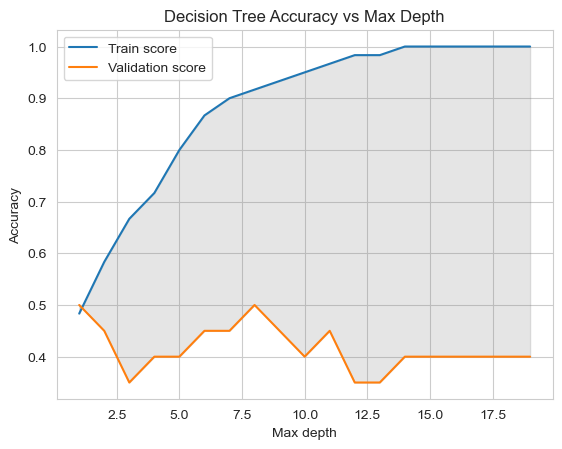

,max_depth,train_acc,val_acc,score_diff
0,1,0.483333,0.50,-0.016667
1,2,0.583333,0.45,0.133333
2,3,0.666667,0.35,0.316667
3,4,0.716667,0.40,0.316667
4,5,0.800000,0.40,0.400000
5,6,0.866667,0.45,0.416667
6,7,0.900000,0.45,0.450000
7,8,0.916667,0.50,0.416667
8,9,0.933333,0.45,0.483333
9,10,0.950000,0.40,0.550000


In [44]:
scores_df = decision_tree(X_bow, X_validate_bow, y_train, y_validate)
scores_df

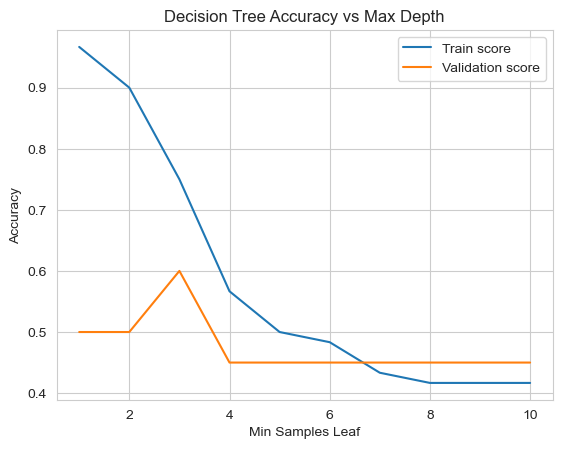

,min_samples_leaf,max_depth,train_score,validate_score,score_difference
0,1,10,0.966667,0.50,0.466667
1,2,9,0.900000,0.50,0.400000
2,3,8,0.750000,0.60,0.150000
3,4,7,0.566667,0.45,0.116667
4,5,6,0.500000,0.45,0.050000
5,6,5,0.483333,0.45,0.033333
6,7,4,0.433333,0.45,-0.016667
7,8,3,0.416667,0.45,-0.033333
8,9,2,0.416667,0.45,-0.033333
9,10,1,0.416667,0.45,-0.033333


In [45]:
df = random_forest_scores(X_bow, y_train, X_validate_bow, y_validate)
df

In [51]:
best_model_classification_matrix(X_bow, y_train, X_validate_bow, y_validate)

Tree with max depth of 1 train
           HTML  Java  JavaScript      Other    Python  TypeScript  accuracy  \
precision   0.0   0.0         0.0   0.461538  0.625000         0.0  0.483333   
recall      0.0   0.0         0.0   0.960000  0.714286         0.0  0.483333   
f1-score    0.0   0.0         0.0   0.623377  0.666667         0.0  0.483333   
support     4.0   7.0        16.0  25.000000  7.000000         1.0  0.483333   

           macro avg  weighted avg  
precision   0.181090      0.265224  
recall      0.279048      0.483333  
f1-score    0.215007      0.337518  
support    60.000000     60.000000  

Tree with max depth of 1 validate
           HTML  Java  JavaScript     Other    Python  TypeScript  accuracy  \
precision   0.0   0.0         0.0  0.529412  0.333333         0.0       0.5   
recall      0.0   0.0         0.0  1.000000  0.500000         0.0       0.5   
f1-score    0.0   0.0         0.0  0.692308  0.400000         0.0       0.5   
support     1.0   2.0         5.

/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.1